In [39]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob 
import collections

try:
    plt.style.use(['science', 'high-vis', 'grid'])
except:
    plt.style.use(['seaborn-paper'])

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 100

In [40]:
FILENAMES = glob.glob("../build/*output_3d_temperature.csv")
DIR_FIG = "../build/figures/"
os.makedirs(DIR_FIG, exist_ok=True)
DICT_FILES = {}
for filename in FILENAMES:
    size = int(filename.split("_")[-4])
    temperature, energy, magnetization, specific_heat, susceptibility = np.loadtxt(filename,
                                                                               skiprows=1,
                                                                               unpack=True,
                                                                               delimiter=',')
    DICT_FILES[size] = [temperature, energy, magnetization, specific_heat, susceptibility]
DICT_FILES = collections.OrderedDict(sorted(DICT_FILES.items()))
print("Number of files: ", len(DICT_FILES))

Number of files:  1


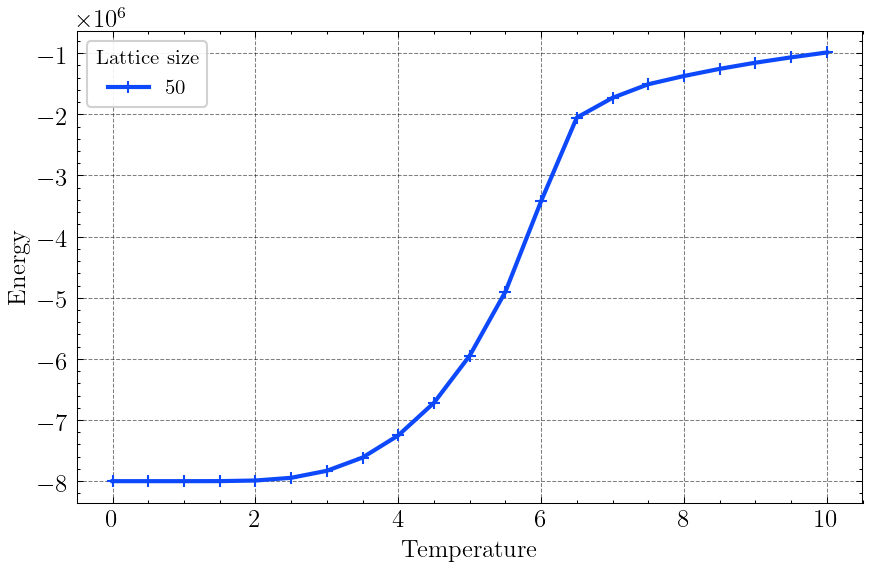

In [41]:
fig, axs = plt.subplots(dpi=150)
axs.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs.set_xlabel("Temperature")
axs.set_ylabel("Energy")
index_ls = 0
for key, value in DICT_FILES.items():
    temperature, energy, magnetization, specific_heat, susceptibility = value
    axs.plot(temperature, energy, "+-", lw=2, label=f"{key}")
axs.legend(title="Lattice size", loc="best", frameon=True, framealpha=0.9, fancybox=True, fontsize=10)
fig.tight_layout()
fig.savefig(DIR_FIG + "ising_2d_energy.png", facecolor="w")

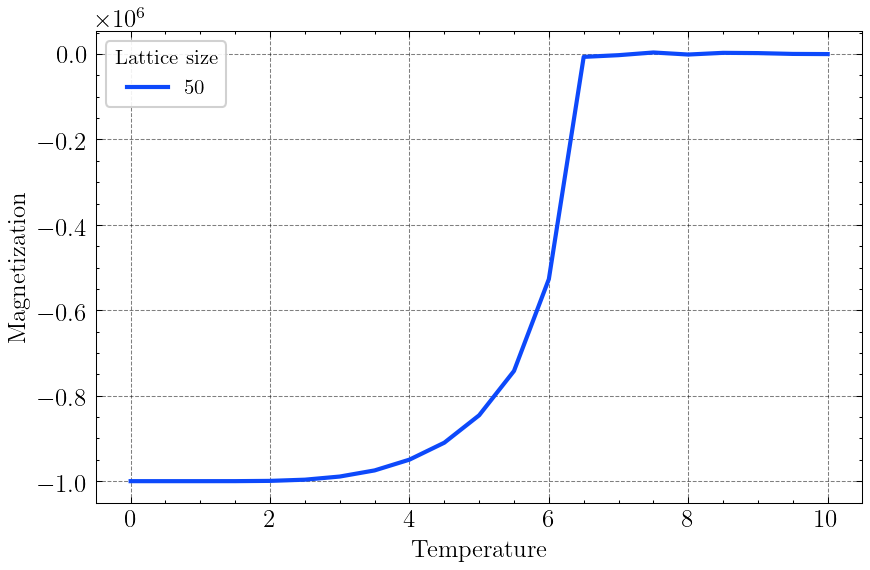

In [42]:
fig, axs = plt.subplots(dpi=150)
axs.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs.set_xlabel("Temperature")
axs.set_ylabel("Magnetization")

for key, value in DICT_FILES.items():
    temperature, energy, magnetization, specific_heat, susceptibility = value
    axs.plot(temperature, magnetization, "-", lw=2, label=f"{key}")
axs.legend(title="Lattice size", loc="best", frameon=True, framealpha=0.9, fancybox=True, fontsize=10)
fig.tight_layout()
fig.savefig(DIR_FIG + "ising_2d_magnetization.png", facecolor="w")

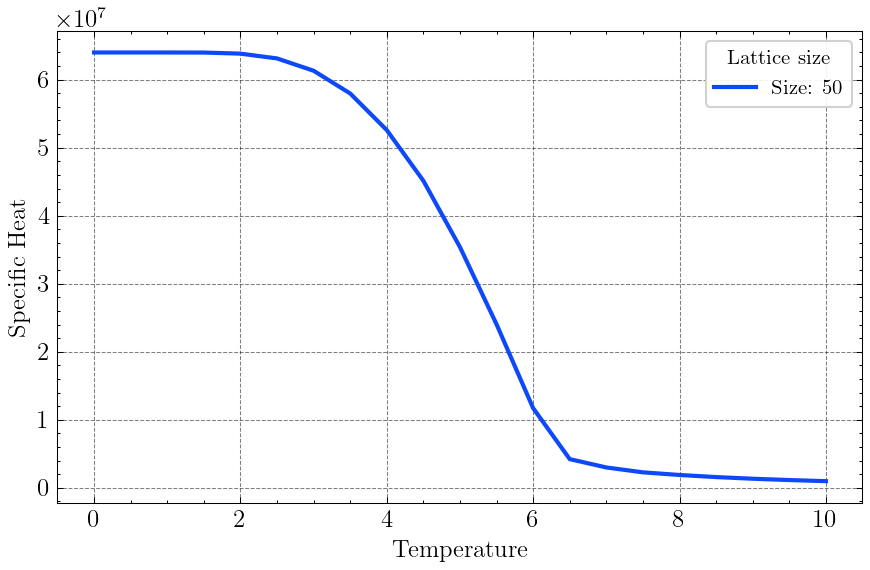

In [43]:
fig, axs = plt.subplots(dpi=150)
axs.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs.set_xlabel("Temperature")
axs.set_ylabel("Specific Heat")

for key, value in DICT_FILES.items():
    temperature, energy, magnetization, specific_heat, susceptibility = value
    axs.plot(temperature, specific_heat, "-", lw=2, label=f"Size: {size}")
axs.legend(title="Lattice size", loc="best", frameon=True, framealpha=0.9, fancybox=True, fontsize=10)
fig.tight_layout()
fig.savefig(DIR_FIG + "ising_2d_specific_heat.png", facecolor="w")

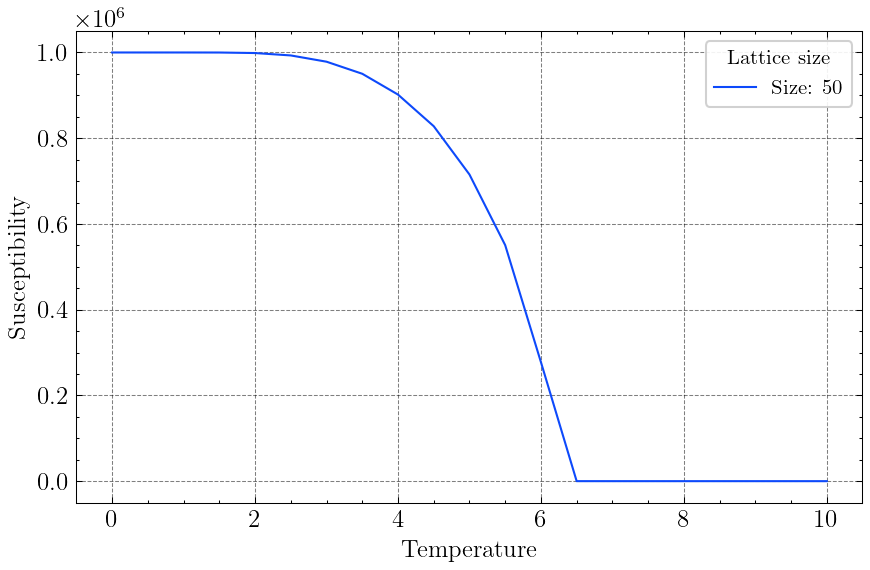

In [44]:
fig, axs = plt.subplots(dpi=150)
axs.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
axs.set_xlabel("Temperature")
axs.set_ylabel("Susceptibility")


for key, value in DICT_FILES.items():
    temperature, energy, magnetization, specific_heat, susceptibility = value
    axs.plot(temperature, susceptibility, "-" , label=f"Size: {size}")
axs.legend(title="Lattice size", loc="best", frameon=True, framealpha=0.9, fancybox=True, fontsize=10)
fig.tight_layout()
fig.savefig(DIR_FIG + "ising_2d_susceptibility.png", facecolor="w")

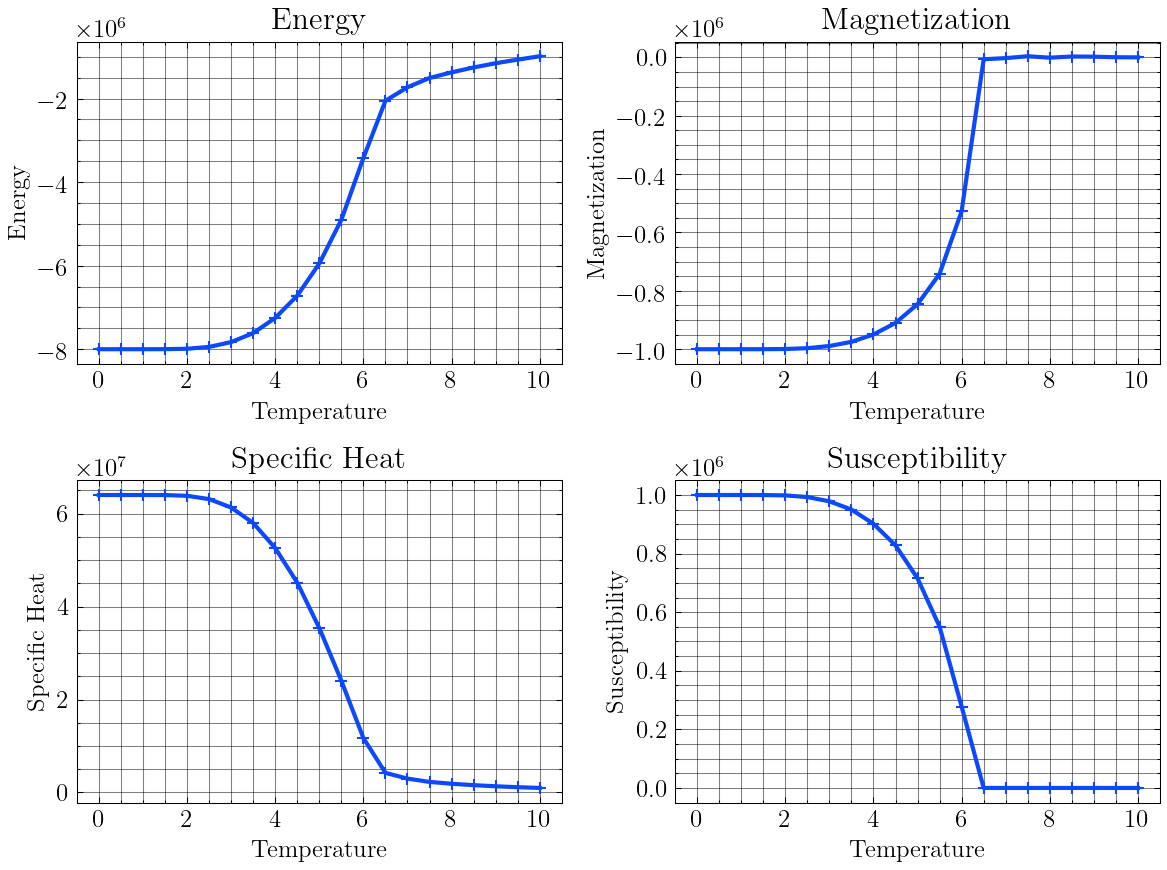

In [45]:
# 2 by two plot
fig, axs = plt.subplots(2, 2, dpi=150, figsize=(8, 6))
for ax in axs.flat:
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_xlabel("Temperature")
    # ax.set_xlim(0, 3.5)
    # ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    ax.grid(True, which="both", ls="-")
    ax.set_axisbelow(True)

    

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

axs[0, 0].set_title("Energy")
axs[0, 1].set_title("Magnetization")
axs[1, 0].set_title("Specific Heat")
axs[1, 1].set_title("Susceptibility")


    
axs[0, 0].set_ylabel("Energy")
axs[0, 1].set_ylabel("Magnetization")
axs[1, 0].set_ylabel("Specific Heat")
axs[1, 1].set_ylabel("Susceptibility")

for key, value in DICT_FILES.items():
    temperature, energy, magnetization, specific_heat, susceptibility = value
    axs[0, 0].plot(temperature, energy, "+-", lw=2, label=f"Size: {size}")
    axs[0, 1].plot(temperature, magnetization, "+-", lw=2, label=f"Size: {size}")
    axs[1, 0].plot(temperature, specific_heat, "+-", lw=2, label=f"Size: {size}")
    axs[1, 1].plot(temperature, susceptibility, "+-", lw=2, label=f"Size: {size}")

# for ax in axs.flat:
#     ax.legend(title="Lattice size", loc="best", frameon=True, framealpha=0.9, fancybox=True, fontsize=10)
    
fig.tight_layout()
fig.savefig(DIR_FIG + "ising_2d_plots.png", facecolor="w", dpi=300)
